In [1]:
import os
from tqdm import tqdm
import numpy as np 
import pandas as pd
import os
import scipy.ndimage
import nibabel as nib
import matplotlib.pyplot as plt
from numpy.random import rand
from skimage import measure, morphology
from scipy.ndimage import zoom
import cv2

%matplotlib inline

In [2]:
def hu_to_grayscale(volume, hu_min, hu_max):
    # Clip at max and min values if specified
    if hu_min is not None or hu_max is not None:
        volume = np.clip(volume, hu_min, hu_max)

    # Scale to values between 0 and 1
    mxval = np.max(volume)
    mnval = np.min(volume)
    im_volume = (volume - mnval)/max(mxval - mnval, 1e-3)

    # Return values scaled to 0-255 range, but *not cast to uint8*
    # Repeat three times to make compatible with color overlay
    im_volume = 255*im_volume
    return np.stack((im_volume, im_volume, im_volume), axis=-1)

def class_to_color(segmentation, k_color = [255, 0, 0], t_color = [0, 0, 255]):
    # initialize output to zeros
    shp = segmentation.shape
    seg_color = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.float32)

    # set output to appropriate color at each location
    seg_color[np.equal(segmentation,1)] = k_color
    seg_color[np.equal(segmentation,2)] = t_color
    return seg_color

def overlay(volume_ims, segmentation_ims, segmentation, alpha):
    # Get binary array for places where an ROI lives
    segbin = np.greater(segmentation, 0)
    repeated_segbin = np.stack((segbin, segbin, segbin), axis=-1)
    # Weighted sum where there's a value to overlay
    overlayed = np.where(
        repeated_segbin,
        np.round(alpha*segmentation_ims+(1-alpha)*volume_ims).astype(np.uint8),
        np.round(volume_ims).astype(np.uint8)
    )
    return overlayed



In [3]:
def resize_image(img , width, height):
    img_sm = np.zeros((len(img), width, height))
    for i in range(len(img)):
        idx = img[i, :, :]
        idx_sm = cv2.resize(idx, (width, height), interpolation=cv2.INTER_AREA)
        img_sm[i, :, :] = idx_sm
        
    return img_sm

def change_depth_siz(img, depth):
    desired_depth = depth
    current_depth = img.shape[0]
    depth = current_depth / desired_depth
    depth_factor = 1 / depth
    img_new = zoom(img, (depth_factor, 1, 1), mode='nearest')
    return img_new


In [9]:
import tensorflow as tf
import os
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6148)])
  except RuntimeError as e:
    print(e)

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [10]:
#Image resizing function
def resizing(width, height, depth):
    for i in range(210,300):
        cid = f'{i:05}'
        path = f"data_np/case_{cid}/"

        print(f'CASE : {cid}')
        img = np.load(path + 'img.npy')
        print("Raw volume size: ", img.shape)
        #seg = np.load(path + 'seg.npy')
        #seg = seg.astype(np.float32)

        img = resize_image(img, width, height)
        #seg = resize_image(seg, width, height)
        #seg = seg.astype(np.int32)


        img_siz = change_depth_siz(img, depth)
        #seg_siz = change_depth_siz(seg, depth)
        
        print("New volume size: ", img_siz.shape)
        
        np.save(f'data_np/case_{cid}/img.npy', img_siz)
        #np.save(f'data_np/case_{cid}/seg.npy', seg_siz)


In [11]:
#Initialize the width, height and depth
width, height, depth = 299, 299, 160
resizing(width, height, depth)

Raw volume size:  (611, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (602, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (261, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (270, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (64, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (834, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (157, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (61, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (227, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (77, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (50, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (80, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (89, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (92, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (439, 512, 512)
New volume size:  (16

New volume size:  (160, 299, 299)
Raw volume size:  (50, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (389, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (262, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (171, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (107, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (105, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (206, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (48, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (53, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (159, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (532, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (186, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (61, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  (634, 512, 512)
New volume size:  (160, 299, 299)
Raw volume size:  

In [17]:
#Visualize a case after resizing
def Visualize(case, rows, columns, width, height):
    cid = f'{case:05}'
    path = f"data_pp/case_{cid}/"

    img = np.load(path + 'img.npy')
    seg = np.load(path + 'seg.npy')
    seg = seg.astype(np.float32)
    img_siz = hu_to_grayscale(img, -width, height)
    seg_siz = class_to_color(seg, [255, 0, 0], [0, 0, 255])

    plt.subplots(rows, columns,figsize=(15, 25))
    x = 1
    for i in range(1, rows+1):
        for j in range(1, columns+1):
            plt.subplot(rows, columns, x)
            image = overlay(img_siz, seg_siz, img, 0.3)
            plt.imshow(image[x-1], cmap='gray')
            x += 1
    plt.show()

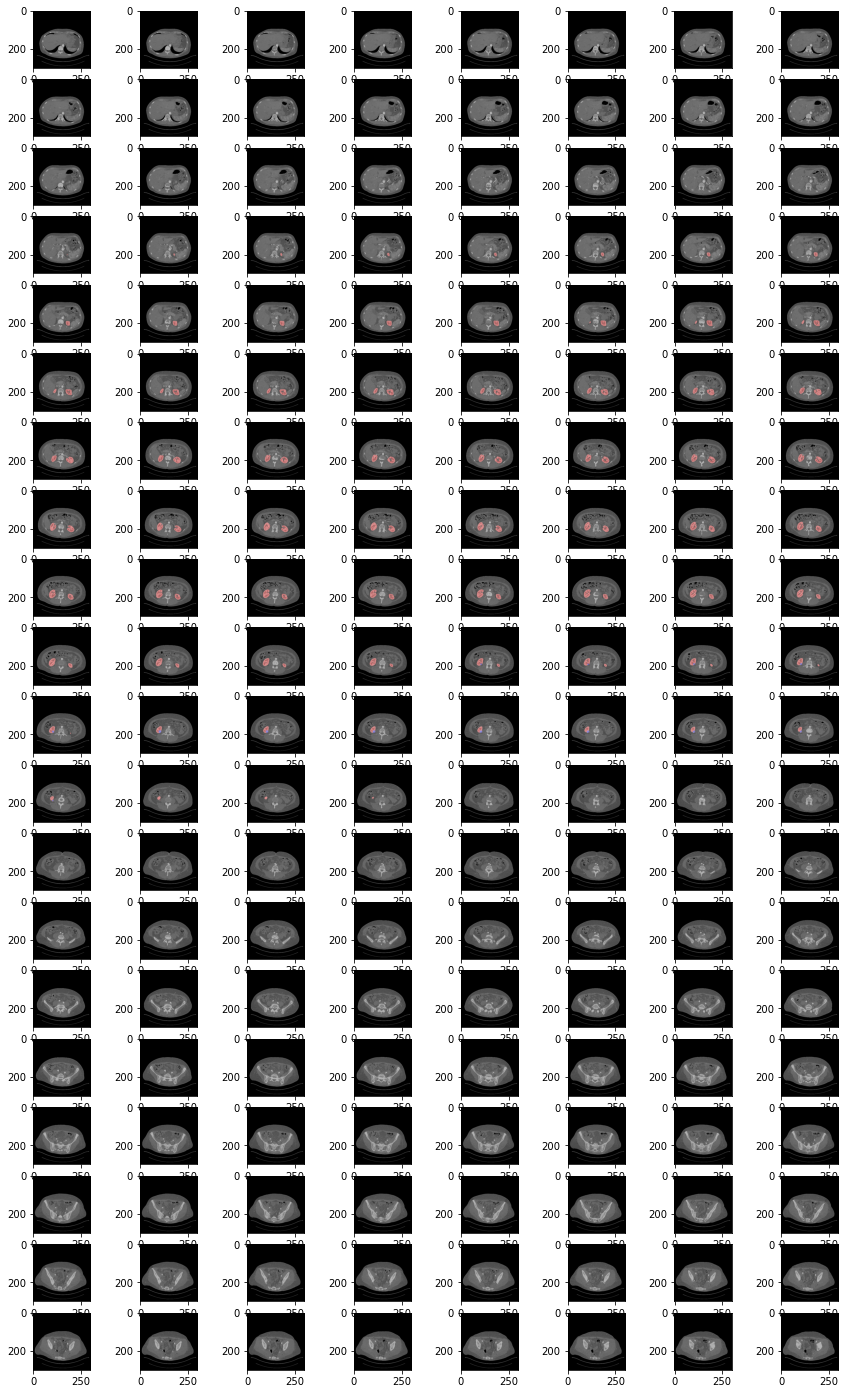

In [18]:
#Make sure rows * columns = depth and columns < 10
rows = 20
columns = 8
case = 0
Visualize(case, rows, columns, width, height)